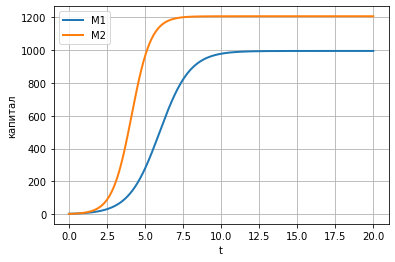

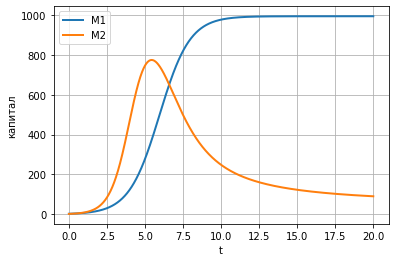

In [1]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt
import math

t0 = 0

x0 = [2.6, 1.9]
p_cr = 19
N = 17.5
q = 1

tau1 = 12
tau2 = 16

p1 = 10
p2 = 6.6

d = 0.0015

a1 = p_cr/(tau1*tau1*p1*p1*N*q)
a2 = p_cr/(tau2*tau2*p2*p2*N*q)
b = p_cr/(tau1*tau1*tau2*tau2*p1*p1*p2*p2*N*q)
c1 = (p_cr-p1)/(tau1*p1)
c2 = (p_cr-p2)/(tau2*p2)

t = np.arange( t0, 20, 0.01)

def syst(y, t):
    y1, y2 = y
    return [ y1 - (a1/c1)*y1*y1 - (b/c1)*y1*y2, (c2/c1)*y2 - (a2/c1)*y2*y2 - (b/c1)*y1*y2 ]

def syst2(y, t):
    y1, y2 = y
    return [ y1 - (a1/c1)*y1*y1 - (b/c1)*y1*y2, (c2/c1)*y2 - (a2/c1)*y2*y2 - (b/c1+d)*y1*y2 ]

y1 = odeint(syst, x0, t)
y2 = odeint(syst2, x0, t)

M11 = y1[:,0]
M12 = y1[:,1]

M21 = y2[:,0]
M22 = y2[:,1]

fig = plt.figure(facecolor='white')
plt.plot(t, M11, linewidth=2, label='M1')
plt.plot(t, M12, linewidth=2, label='M2')
plt.ylabel("капитал")
plt.xlabel("t")
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('01.png', dpi = 600)

fig = plt.figure(facecolor='white')
plt.plot(t, M21, linewidth=2, label='M1')
plt.plot(t, M22, linewidth=2, label='M2')
plt.ylabel("капитал")
plt.xlabel("t")
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('02.png', dpi = 600)
